In [33]:
## -----------IMPORT LIBRARIES
import pandas as pd #for dealing with csv import
import matplotlib.pyplot as plt  # Matplotlib's pyplot: MATLAB-like syntax
import scipy
from scipy import stats
import numpy as np
import seaborn as sns


In [34]:
# # GET THE DATA
iat_race=pd.read_csv('C:\\Users\David\\Desktop\\OpenBrains\\summary_imerys.csv')

dat={} #store for summary stats. We use a dict because can be dynamically allocated
basis=np.zeros(2) # IAT race, RAW race,order variable

# COLLATE THE DATA

#iterate through all IAT race data
for i in range(0,len(iat_race)):
    #get filename
    name_full=iat_race['file'].iloc[0]
    name= name_full.split('_')[0]
    #from the filename we extract the ppt number
    ppt_number=i
    #creat a dict entry for that ppt
    ppt_dat=basis.copy()
    ppt_dat[0]=iat_race['IAT score'].values[i]
    ppt_dat[1]=iat_race['raw uncorrected'].values[i]
    dat[ppt_number]=ppt_dat


#now we can extract paired IAT scores
            
IATrace=[]  
RAWrace=[]
            
for key in dat:
    IATrace.append(dat[key][0])              
    RAWrace.append(dat[key][1])              

####

Text(-1.45,-1.7,'black racism')

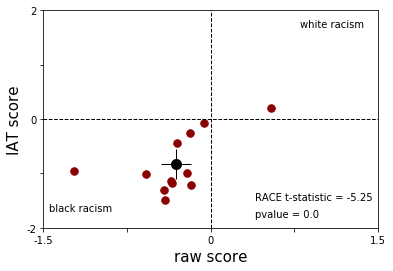

In [35]:
for i in range(len(RAWrace)):
    plt.plot(RAWrace[i], IATrace[i], marker='.', markersize=15, color='darkred' )


#plt.xlim([-0.5,0.5])
#plt.xticks([-0.5, -0.25, 0, 0.25, 0.5], ['-0.5', '', '0', '', '0.5'], fontsize=10)
plt.xlim([-1.5,1.5])
plt.xticks([-1.5, -0.75, 0, 0.75, 1.5], ['-1.5', '', '0', '', '1.5'], fontsize=10)

#plt.plot([-0.5, 0.5], [0,0], 'k--', linewidth=1)
plt.plot([-1.5, 1.5], [0,0], 'k--', linewidth=1)


plt.ylim([-2,2])
plt.yticks([-2,-1, 0, 1,2], ['-2','', '0', '','2'], fontsize=10)

plt.plot( [0,0], [-2,2], 'k--', linewidth=1)
plt.xlabel('raw score', fontsize=15)
plt.ylabel('IAT score', fontsize=15)

plt.plot(np.mean(RAWrace), np.mean(IATrace), marker='+', markersize=30, color='k' )
plt.plot(np.mean(RAWrace), np.mean(IATrace), marker='.', markersize=20, color='k' )

stats = scipy.stats.ttest_1samp(IATrace, 0)

# plt.text( 0.1, -1.5, 'RACE t-statistic = ' + str(np.round(stats[0], 3)), fontsize=10 )
# plt.text( 0.1, -1.8, 'pvalue = ' + str(np.round(stats[1], 3)), fontsize=10 )
plt.text( 0.4, -1.5, 'RACE t-statistic = ' + str(np.round(stats[0], 3)), fontsize=10 )
plt.text( 0.4, -1.8, 'pvalue = ' + str(np.round(stats[1], 3)), fontsize=10 )


# plt.text( 0.3, 1.7, 'white racism' , fontsize=10 )
# plt.text( -0.45, -1.7, 'black racism' , fontsize=10 )
plt.text( 0.8, 1.7, 'white racism' , fontsize=10 )
plt.text( -1.45, -1.7, 'black racism' , fontsize=10 )


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(-0.2,1.2,'pvalue = 0.021')

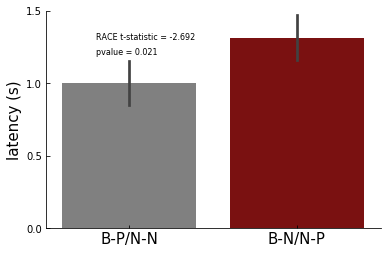

In [36]:
########### REACTION TIMES

c_ = iat_race['congruent mean RT'].values
c_adj = iat_race['congruent adjmean RT'].values
congruent = pd.DataFrame({'reaction time': c_, 'reaction time adj': c_adj})
congruent['condition'] = 'congruent'


i_ = iat_race['incongruent mean RT'].values
i_adj = iat_race['incongruent adjmean RT'].values
incongruent = pd.DataFrame({'reaction time': i_,  'reaction time adj': i_adj})
incongruent['condition'] = 'incongruent'


reaction_time = pd.concat([congruent, incongruent])

sns.barplot(x='condition', y='reaction time', palette=['grey', 'darkred'], ci=68, estimator=np.mean, data=reaction_time)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylim(0,1.5)
plt.yticks([0,0.5,1,1.5])
plt.ylabel('latency (s)', fontsize=15)
plt.xlabel('')
plt.xticks([0,1], ['B-P/N-N', 'B-N/N-P'], fontsize=15)
stats2 = scipy.stats.ttest_rel(c_, i_)
plt.text( -0.2, 1.3, 'RACE t-statistic = ' + str(np.round(stats2[0], 3)), fontsize=8 )
plt.text( -0.2, 1.2, 'pvalue = ' + str(np.round(stats2[1], 3)), fontsize=8 )




C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


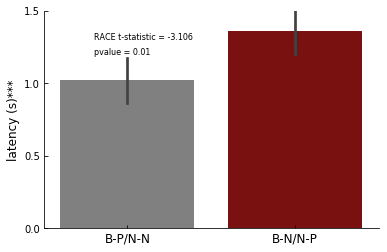

In [37]:
sns.barplot(x='condition', y='reaction time adj', palette=['grey', 'darkred'], ci=68, estimator=np.mean, data=reaction_time)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylim(0,1.5)
plt.yticks([0,0.5,1,1.5])
plt.ylabel('latency (s)***', fontsize=12)
plt.xlabel('')
plt.xticks([0,1], ['B-P/N-N', 'B-N/N-P'], fontsize=12)
stats3 = scipy.stats.ttest_rel(c_adj, i_adj)
plt.text( -0.2, 1.3, 'RACE t-statistic = ' + str(np.round(stats3[0], 3)), fontsize=8 )
plt.text( -0.2, 1.2, 'pvalue = ' + str(np.round(stats3[1], 3)), fontsize=8 )
plt.show(block=False)

##  BACKUP

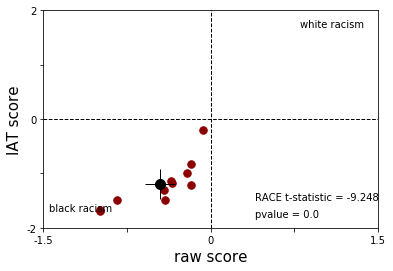

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


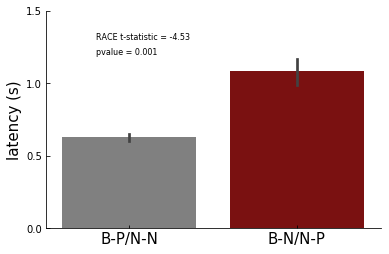

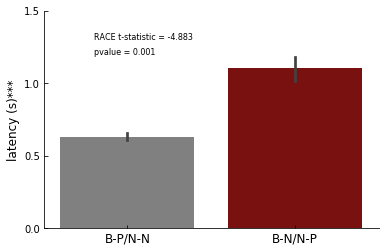

In [32]:
# # GET THE DATA
iat_race=pd.read_csv('C:\\Users\David\\Desktop\\OpenBrains\\summary_imerys_backup.csv')

dat={} #store for summary stats. We use a dict because can be dynamically allocated
basis=np.zeros(2) # IAT race, RAW race,order variable

# COLLATE THE DATA

#iterate through all IAT race data
for i in range(0,len(iat_race)):
    #get filename
    name_full=iat_race['file'].iloc[0]
    name= name_full.split('_')[0]
    #from the filename we extract the ppt number
    ppt_number=i
    #creat a dict entry for that ppt
    ppt_dat=basis.copy()
    ppt_dat[0]=iat_race['IAT score'].values[i]
    ppt_dat[1]=iat_race['raw uncorrected'].values[i]
    dat[ppt_number]=ppt_dat


#now we can extract paired IAT scores
            
IATrace=[]  
RAWrace=[]
            
for key in dat:
    IATrace.append(dat[key][0])              
    RAWrace.append(dat[key][1])              

####

plt.figure()

for i in range(len(RAWrace)):
    plt.plot(RAWrace[i], IATrace[i], marker='.', markersize=15, color='darkred' )


#plt.xlim([-0.5,0.5])
#plt.xticks([-0.5, -0.25, 0, 0.25, 0.5], ['-0.5', '', '0', '', '0.5'], fontsize=10)
plt.xlim([-1.5,1.5])
plt.xticks([-1.5, -0.75, 0, 0.75, 1.5], ['-1.5', '', '0', '', '1.5'], fontsize=10)

#plt.plot([-0.5, 0.5], [0,0], 'k--', linewidth=1)
plt.plot([-1.5, 1.5], [0,0], 'k--', linewidth=1)


plt.ylim([-2,2])
plt.yticks([-2,-1, 0, 1,2], ['-2','', '0', '','2'], fontsize=10)

plt.plot( [0,0], [-2,2], 'k--', linewidth=1)
plt.xlabel('raw score', fontsize=15)
plt.ylabel('IAT score', fontsize=15)

plt.plot(np.mean(RAWrace), np.mean(IATrace), marker='+', markersize=30, color='k' )
plt.plot(np.mean(RAWrace), np.mean(IATrace), marker='.', markersize=20, color='k' )

stats = scipy.stats.ttest_1samp(IATrace, 0)

# plt.text( 0.1, -1.5, 'RACE t-statistic = ' + str(np.round(stats[0], 3)), fontsize=10 )
# plt.text( 0.1, -1.8, 'pvalue = ' + str(np.round(stats[1], 3)), fontsize=10 )
plt.text( 0.4, -1.5, 'RACE t-statistic = ' + str(np.round(stats[0], 3)), fontsize=10 )
plt.text( 0.4, -1.8, 'pvalue = ' + str(np.round(stats[1], 3)), fontsize=10 )


# plt.text( 0.3, 1.7, 'white racism' , fontsize=10 )
# plt.text( -0.45, -1.7, 'black racism' , fontsize=10 )
plt.text( 0.8, 1.7, 'white racism' , fontsize=10 )
plt.text( -1.45, -1.7, 'black racism' , fontsize=10 )
plt.show()

#####


########### REACTION TIMES

c_ = iat_race['congruent mean RT'].values
c_adj = iat_race['congruent adjmean RT'].values
congruent = pd.DataFrame({'reaction time': c_, 'reaction time adj': c_adj})
congruent['condition'] = 'congruent'


i_ = iat_race['incongruent mean RT'].values
i_adj = iat_race['incongruent adjmean RT'].values
incongruent = pd.DataFrame({'reaction time': i_,  'reaction time adj': i_adj})
incongruent['condition'] = 'incongruent'


reaction_time = pd.concat([congruent, incongruent])

plt.figure()

sns.barplot(x='condition', y='reaction time', palette=['grey', 'darkred'], ci=68, estimator=np.mean, data=reaction_time)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylim(0,1.5)
plt.yticks([0,0.5,1,1.5])
plt.ylabel('latency (s)', fontsize=15)
plt.xlabel('')
plt.xticks([0,1], ['B-P/N-N', 'B-N/N-P'], fontsize=15)
stats2 = scipy.stats.ttest_rel(c_, i_)
plt.text( -0.2, 1.3, 'RACE t-statistic = ' + str(np.round(stats2[0], 3)), fontsize=8 )
plt.text( -0.2, 1.2, 'pvalue = ' + str(np.round(stats2[1], 3)), fontsize=8 )
plt.show()

####

plt.figure()
sns.barplot(x='condition', y='reaction time adj', palette=['grey', 'darkred'], ci=68, estimator=np.mean, data=reaction_time)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylim(0,1.5)
plt.yticks([0,0.5,1,1.5])
plt.ylabel('latency (s)***', fontsize=12)
plt.xlabel('')
plt.xticks([0,1], ['B-P/N-N', 'B-N/N-P'], fontsize=12)
stats3 = scipy.stats.ttest_rel(c_adj, i_adj)
plt.text( -0.2, 1.3, 'RACE t-statistic = ' + str(np.round(stats3[0], 3)), fontsize=8 )
plt.text( -0.2, 1.2, 'pvalue = ' + str(np.round(stats3[1], 3)), fontsize=8 )
plt.show(block=False)
plt.show()
